# <span style="color:cyan"> Titanic - Machine Learning from Disaster
### <span style="color:lightblue"> DATASET obtenido desde las competiciones de kaggle.com

#### <span style="color:#87CEEB"> Objetivo: Usar Machine Learning para crear un modelo que prediga qué pasajeros sobrevivieron al hundimiento del Titanic.

#### <span style="color:#87CEEB"> La métrica que se busca mejorar es el accuracy.
https://www.kaggle.com/competitions/titanic/overview/evaluation

## <span style="color:orange"> Librerías a utilizar

In [99]:
# Ingesta
import numpy as np
import pandas as pd
import scipy.stats as stats

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# Modelación
import statsmodels.formula.api as smf
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

# Métricas de evaluación
from sklearn.metrics import classification_report

# Otros
import warnings
warnings.filterwarnings("ignore")

### <span style="color:orange"> Significado de columnas:
* PassengerId: Identificador de pasajero.

* Survived: Variable Binaria. Indica si el pasajero sobrevivió (1) o no (0).

* Pclass: Indica la clase del pasajero. 1era, 2da o 3ra clase.

* Name: Nombre del pasajero.

* Sex: Sexo del pasajero.

* Age: Edad del pasajero.

* SibSp: Define las relaciones familiares. Sibling = brother, sister, stepbrother, stepsister.
                                             Spouse = husband, wife (mistresses y fiancés fueron ignoradas).

* Parch: Número de padres/niños a bordo del Titanic.

* Ticket: Numero del ticket.

* Fare: Tarifa del pasajero.

* Cabin: Número de cabina del pasajero.

* Embarked: Puerto de embarque del pasajero. C = Cherbourg, Q = Queenstown, S = Southampton

## <span style="color:orange"> Carga de datasets

In [100]:
# carga de datos
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [101]:
# df_train
display(df_train.head())
df_train.shape

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(891, 12)

In [102]:
# df_test
display(df_test.head())
df_test.shape

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


(418, 11)

    Este dataset no contiene el vector objetivo 'Survived', ya que será el utilizado para predecir los valores.

## <span style="color:orange"> Análisis vector objetivo

### <span style="color:#87CEEB"> Valores únicos

In [103]:
# valores únicos
print(f'df_train:\n', df_train['Survived'].unique(),'\n','-'*12)

df_train:
 [0 1] 
 ------------


    Se observa que los valores calzan con lo descrito en el apartado de significado de las variables.

### <span style="color:#87CEEB"> Cantidad de nulos

In [104]:
# presencia de nulos
df_train['Survived'].isna().value_counts()

False    891
Name: Survived, dtype: int64

### <span style="color:#87CEEB"> Distribución de observaciones

df_train:
 0    549
1    342
Name: Survived, dtype: int64 
 ------------------------------


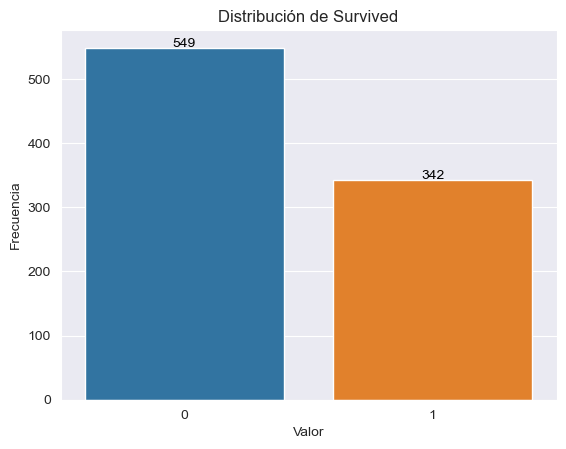

In [105]:
print(f'df_train:\n', df_train['Survived'].value_counts(),'\n','-'*30)

ax = sns.countplot(x=df_train['Survived'])
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 3), textcoords='offset points')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Distribución de Survived')
plt.show()

    Se observa un desbalance entre las clases, en donde la mayoritaria corresponde a '0'. Esta etiqueta indica que el pasajero no sobrevivió.

## <span style="color:orange"> Análisis de nulos en los atributos

In [106]:
df_train.drop('Survived', axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [107]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### <span style="color:#87CEEB"> Cantidad de nulos

In [108]:
def graficar_nulos(data, var:str):
    ''' 
    Ingresa un dataframe y la variable a graficar     
    '''
    null_counts_genre = data[var].isna().value_counts()
    plt.figure(figsize=(3, 4))
    plt.bar(['No nulos', 'Nulos'], null_counts_genre, color=['goldenrod', 'red'])
    plt.title(f"Distribución de nulos en {var}")
    plt.ylabel('Cantidad')

    for i, count in enumerate(null_counts_genre):
        plt.text(i, count, str(count), ha='center', va='bottom')

In [109]:
# Para df_train
df_train.drop('Survived', axis=1).isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [110]:
# Para df_test
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### <span style="color:#87CEEB"> Exploración de nulos en atributos 'Age' para df_train y df_test

In [111]:
def cant_nulos(data, var:str):
    print('Valores únicos:\n', data[var].unique())
    print('\nNulos:', data[var].isnull().sum())

    porcentaje_nulos = (data[var].isnull().sum() / len(data)) * 100
    print(f"Porcentaje nulos: {porcentaje_nulos:.2f}%")

In [112]:
cant_nulos(df_train, 'Age')

Valores únicos:
 [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]

Nulos: 177
Porcentaje nulos: 19.87%


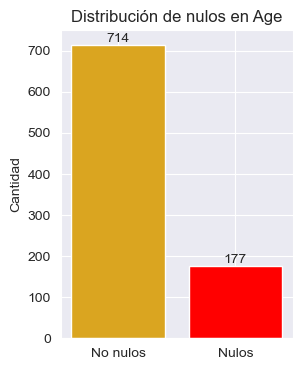

In [113]:
graficar_nulos(df_train, 'Age')

    Se observa que existen valores menores a 1 y 177 valores nulos en df_train

In [114]:
cant_nulos(df_test, 'Age')

Valores únicos:
 [34.5  47.   62.   27.   22.   14.   30.   26.   18.   21.     nan 46.
 23.   63.   24.   35.   45.   55.    9.   48.   50.   22.5  41.   33.
 18.5  25.   39.   60.   36.   20.   28.   10.   17.   32.   13.   31.
 29.   28.5  32.5   6.   67.   49.    2.   76.   43.   16.    1.   12.
 42.   53.   26.5  40.   61.   60.5   7.   15.   54.   64.   37.   34.
 11.5   8.    0.33 38.   57.   40.5   0.92 19.   36.5   0.75  0.83 58.
  0.17 59.   14.5  44.    5.   51.    3.   38.5 ]

Nulos: 86
Porcentaje nulos: 20.57%


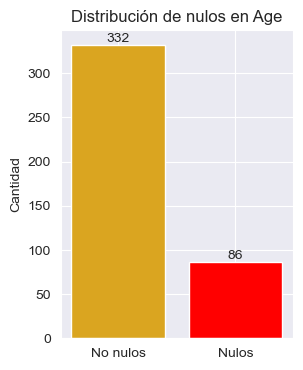

In [115]:
graficar_nulos(df_test, 'Age')

    Se observa que existen valores menores a 1 y 86 valores nulos en df_train

In [116]:
# Imputación de los valores menores que 1 y NaN con la moda
df_train['Age'] = np.where((df_train['Age'] < 1) | df_train['Age'].isnull(), df_train['Age'].mode()[0], df_train['Age'])
df_test['Age'] = np.where((df_test['Age'] < 1) | df_test['Age'].isnull(), df_test['Age'].mode()[0], df_test['Age'])


In [117]:
# Verificación de correcta imputación en df_train
cant_nulos(df_train, 'Age')

Valores únicos:
 [22.  38.  26.  35.  24.  54.   2.  27.  14.   4.  58.  20.  39.  55.
 31.  34.  15.  28.   8.  19.  40.  66.  42.  21.  18.   3.   7.  49.
 29.  65.  28.5  5.  11.  45.  17.  32.  16.  25.  30.  33.  23.  46.
 59.  71.  37.  47.  14.5 70.5 32.5 12.   9.  36.5 51.  55.5 40.5 44.
  1.  61.  56.  50.  36.  45.5 20.5 62.  41.  52.  63.  23.5 43.  60.
 10.  64.  13.  48.  53.  57.  80.  70.  24.5  6.  30.5 34.5 74. ]

Nulos: 0
Porcentaje nulos: 0.00%


In [118]:
# Verificación de correcta imputación en df_test
cant_nulos(df_test, 'Age')

Valores únicos:
 [34.5 47.  62.  27.  22.  14.  30.  26.  18.  21.  46.  23.  63.  24.
 35.  45.  55.   9.  48.  50.  22.5 41.  33.  18.5 25.  39.  60.  36.
 20.  28.  10.  17.  32.  13.  31.  29.  28.5 32.5  6.  67.  49.   2.
 76.  43.  16.   1.  12.  42.  53.  26.5 40.  61.  60.5  7.  15.  54.
 64.  37.  34.  11.5  8.  38.  57.  40.5 19.  36.5 58.  59.  14.5 44.
  5.  51.   3.  38.5]

Nulos: 0
Porcentaje nulos: 0.00%


### <span style="color:#87CEEB"> Exploración de nulos en atributos 'Fare' en df_test

In [119]:
# Verificación de correcta imputación en df_test
cant_nulos(df_test, 'Fare')

Valores únicos:
 [  7.8292   7.       9.6875   8.6625  12.2875   9.225    7.6292  29.
   7.2292  24.15     7.8958  26.      82.2667  61.175   27.7208  12.35
   7.225    7.925   59.4      3.1708  31.6833  61.3792 262.375   14.5
  61.9792  30.5     21.6792  31.5     20.575   23.45    57.75     8.05
   9.5     56.4958  13.4167  26.55     7.85    13.      52.5542  29.7
   7.75    76.2917  15.9     60.      15.0333  23.     263.      15.5792
  29.125    7.65    16.1     13.5      7.725   21.       7.8792  42.4
  28.5375 211.5     25.7     15.2458 221.7792  10.7083  14.4542  13.9
   7.775   52.       7.7958  78.85     7.8542  55.4417   8.5167  22.525
   7.8208   8.7125  15.0458   7.7792  31.6792   7.2833   6.4375  16.7
  75.2417  15.75     7.25    23.25    28.5     25.4667  46.9    151.55
  18.      51.8625  83.1583      nan  12.1833  31.3875   7.55    13.775
   7.7333  22.025   50.4958  34.375    8.9625  39.      36.75    53.1
 247.5208  16.      69.55    32.5    134.5     10.5      8.1125 

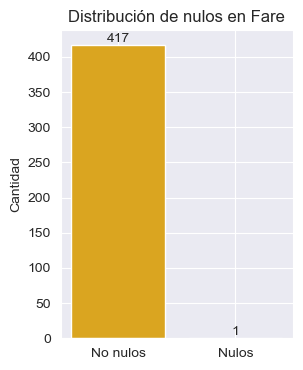

In [120]:
graficar_nulos(df_test, 'Fare')

    Se reemplazará el valor nulo por la moda.

In [121]:
df_test['Fare'] = np.where(df_test['Fare'].isnull(), df_test['Fare'].mode()[0], df_test['Fare'])

print('Nulos:', df_test['Fare'].isnull().sum())

Nulos: 0


### <span style="color:#87CEEB"> Exploración de nulos en atributos 'Cabin' en df_train y df_test

In [122]:
cant_nulos(df_train, 'Cabin')

Valores únicos:
 [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']

Nulos: 687
Porcentaje nul

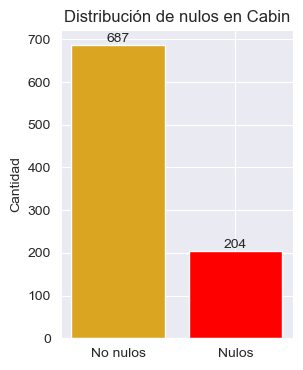

In [123]:
graficar_nulos(df_train, 'Cabin')

In [124]:
cant_nulos(df_test, 'Cabin')

Valores únicos:
 [nan 'B45' 'E31' 'B57 B59 B63 B66' 'B36' 'A21' 'C78' 'D34' 'D19' 'A9'
 'D15' 'C31' 'C23 C25 C27' 'F G63' 'B61' 'C53' 'D43' 'C130' 'C132' 'C101'
 'C55 C57' 'B71' 'C46' 'C116' 'F' 'A29' 'G6' 'C6' 'C28' 'C51' 'E46' 'C54'
 'C97' 'D22' 'B10' 'F4' 'E45' 'E52' 'D30' 'B58 B60' 'E34' 'C62 C64' 'A11'
 'B11' 'C80' 'F33' 'C85' 'D37' 'C86' 'D21' 'C89' 'F E46' 'A34' 'D' 'B26'
 'C22 C26' 'B69' 'C32' 'B78' 'F E57' 'F2' 'A18' 'C106' 'B51 B53 B55'
 'D10 D12' 'E60' 'E50' 'E39 E41' 'B52 B54 B56' 'C39' 'B24' 'D28' 'B41'
 'C7' 'D40' 'D38' 'C105']

Nulos: 327
Porcentaje nulos: 78.23%


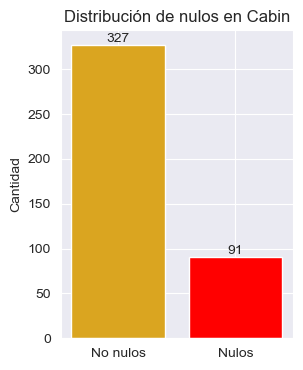

In [125]:
graficar_nulos(df_test, 'Cabin')

    Según mi criterio y por simplicidad esta variable no tiene importancia para este estudio por lo que se eliminará de ambos datasets (df_train y df_test).

In [126]:
df_train = df_train.copy().drop('Cabin', axis=1)
df_test = df_test.copy().drop('Cabin', axis=1)

display(df_train.shape)
display(df_test.shape)

(891, 11)

(418, 10)

### <span style="color:#87CEEB"> Exploración de nulos en atributos 'Embarked' en df_train

In [127]:
# para df_train
cant_nulos(df_train, 'Embarked')

Valores únicos:
 ['S' 'C' 'Q' nan]

Nulos: 2
Porcentaje nulos: 0.22%


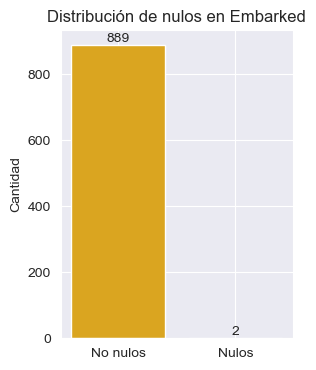

In [128]:
graficar_nulos(df_train, 'Embarked')

In [129]:
# Semilla para replicar resultados
np.random.seed(42)

# Rellena los valores nulos en 'Embarked' con valores aleatorios usando la semilla
df_train.loc[df_train['Embarked'].isnull(), 'Embarked'] = np.random.choice(['S', 'C', 'Q'], size=df_train['Embarked'].isnull().sum())

In [130]:
# Verificación de correcta imputación
cant_nulos(df_train, 'Embarked')

Valores únicos:
 ['S' 'C' 'Q']

Nulos: 0
Porcentaje nulos: 0.00%


### <span style="color:#87CEEB"> Nueva comprobación de nulos en atributos

In [131]:
df_train.drop('Survived', axis=1).isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [132]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [133]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [134]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [135]:
df_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

### <span style="color:#87CEEB"> Estadísticas descriptivas para ambos datasets

In [136]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.749719,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,12.971823,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [137]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,28.608852,0.447368,0.392344,35.560497
std,120.810458,0.841838,12.847640,0.896760,0.981429,55.857145
min,892.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## <span style="color:orange"> Modificación antes de realizar relaciones entre vector objetivo y atributos

    Antes de realizar las relaciones se eliminarán algunos atributos que no aportan información relevante al estudio.

In [138]:
df_train = df_train.copy().drop(['PassengerId', 'Ticket'], axis=1)
df_test = df_test.copy().drop(['Ticket'], axis=1)

In [139]:
display(df_train.head())
display(df_test.head())

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


## <span style="color:orange"> Correlaciones entre vector objetivo y atributos

<Axes: >

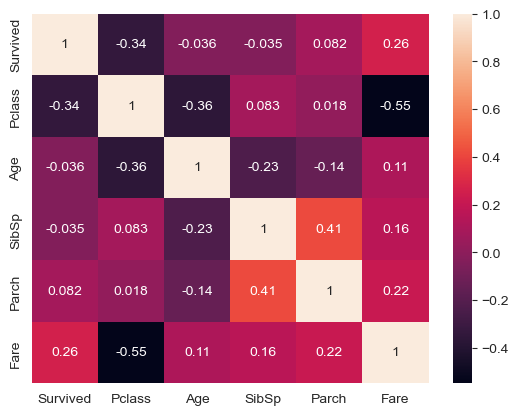

In [140]:
# Heatmap para observar correlaciones entre las variables
corr = df_train.corr()
sns.heatmap(corr, annot=True)

    Se observan varios casos de correlaciones entre atributos medianamente moderadas como por ejemplo, los pares 'Fare-Pclass'(correlación negativa), 'Parch-SibSp'(correlación positiva). También se observan correlaciones destacables entre el vector objetivo y algunos atributos, por ejemplo, 'Fare' y 'Pclass'.

## <span style="color:orange"> Atributos Categóricos vs. Vector Objetivo

### <span style="color:#87CEEB"> Sex vs. Survived

In [141]:
def variable_vs_target(data, var:str, graph_type, figsize=(7,5)):
    if graph_type == sns.countplot:
        plt.figure(figsize=figsize)
        ax = sns.countplot(x=var, hue='Survived', data=data)
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, 3), textcoords='offset points')
        plt.title(f'{var} vs. Survived')
        plt.xlabel(f'{var}')
        plt.ylabel("Cantidad")
        plt.show()
        
    elif graph_type == sns.boxplot:
        plt.figure(figsize=figsize)
        sns.boxplot(x='Survived', y=var, data=data)
        plt.title(f'Boxplot {var} vs Survived')
        plt.xlabel('Survived')
        plt.ylabel(f'{var}')
        plt.show()

    elif graph_type == sns.histplot:
        plt.figure(figsize=figsize)
        sns.histplot(data=data, x=var, hue='Survived', multiple='stack')
        plt.xlabel(f'{var}')
        plt.ylabel('Frecuencia')
        plt.title(f'Distribución de {var}')
        plt.show()

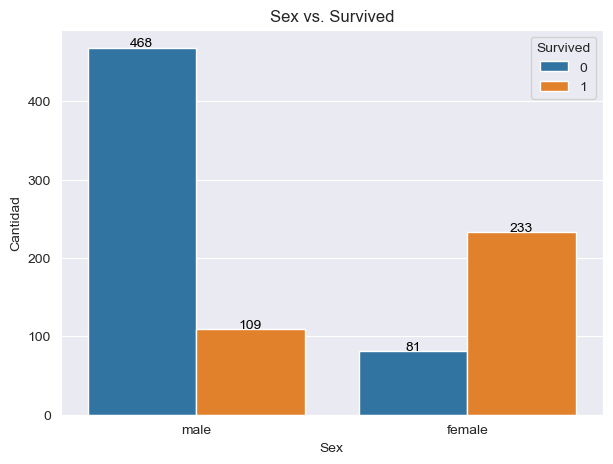

In [142]:
variable_vs_target(df_train, 'Sex', sns.countplot)

    Se observa que la mayoría de fallecimientos pertenece al sexo masculino.

### <span style="color:#87CEEB"> Embarked vs. Survived

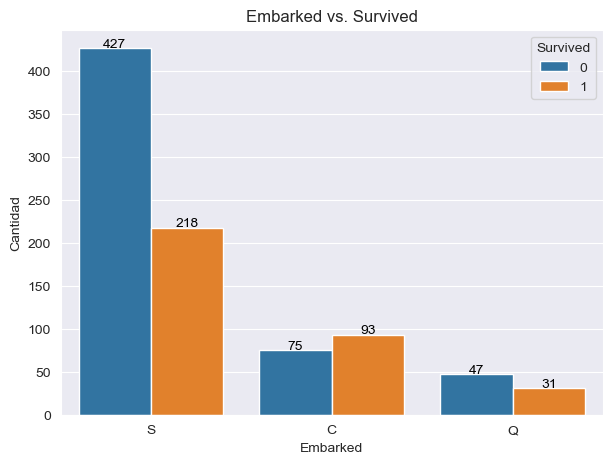

In [143]:
variable_vs_target(df_train, 'Embarked', sns.countplot)

    Se observa que la mayoría de pasajeros que embarcaron en el puerto de Southampton coincide con la mayoría de fallecimientos.

### <span style="color:#87CEEB"> Title vs. Survived

In [144]:
# Extracción de títulos honoríficos y creación de columna 'Title'
df_train['Title'] = df_train['Name'].str.extract(' ([A-Za-z]+)\.')
df_test['Title'] = df_test['Name'].str.extract(' ([A-Za-z]+)\.')

In [145]:
def replace_with_other(title):
    values_to_keep = ['Mr', 'Mrs', 'Miss', 'Master']
    if title in values_to_keep:
        return title
    else:
        return 'Other'

In [146]:
# Aplicar la función a la columna 'Title'
df_train['Title'] = df_train['Title'].apply(replace_with_other)
df_test['Title'] = df_test['Title'].apply(replace_with_other)

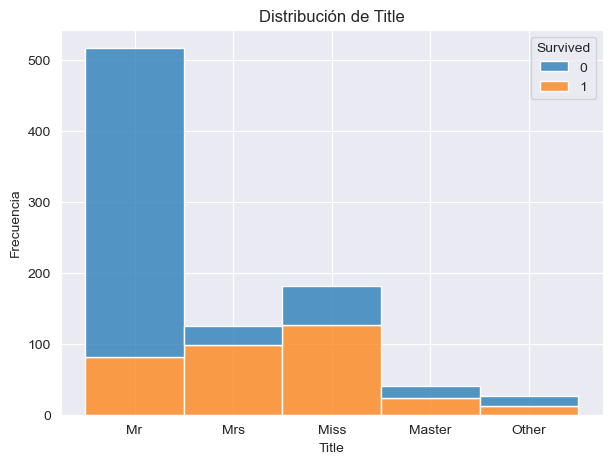

In [147]:
variable_vs_target(df_train, 'Title', sns.histplot)

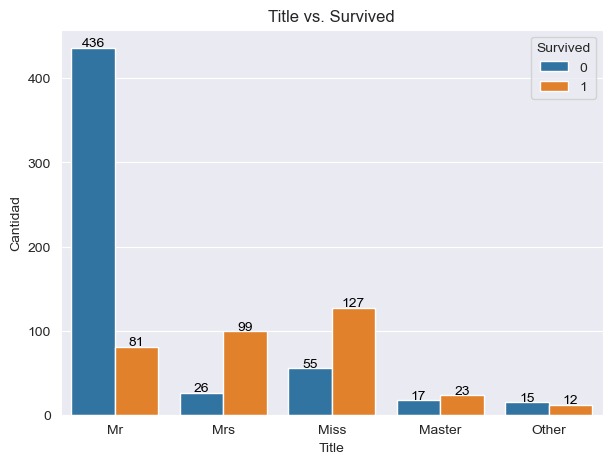

In [148]:
variable_vs_target(df_train, 'Title', sns.countplot)

    La mayoría títulos honoríficos corresponde a Mr.

### <span style="color:#87CEEB"> Title/Embarked vs. Survived

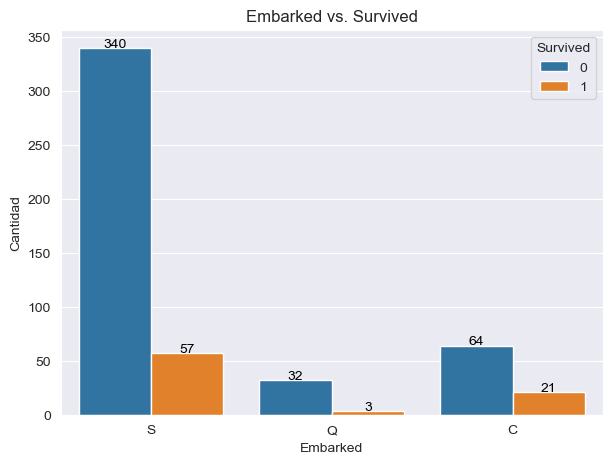

In [149]:
variable_vs_target(df_train[df_train['Title'] == 'Mr'], 'Embarked', sns.countplot)

    El gráfico superior representa aquellos pasajeros con título honorífico 'Mr' y su correspondiente puerto de embarque, además de mostrar la cantidad de sobrevivientes y fallecidos.

## <span style="color:orange"> Atributos Numéricos vs. Vector Objetivo

### <span style="color:#87CEEB"> Pclass vs. Survived

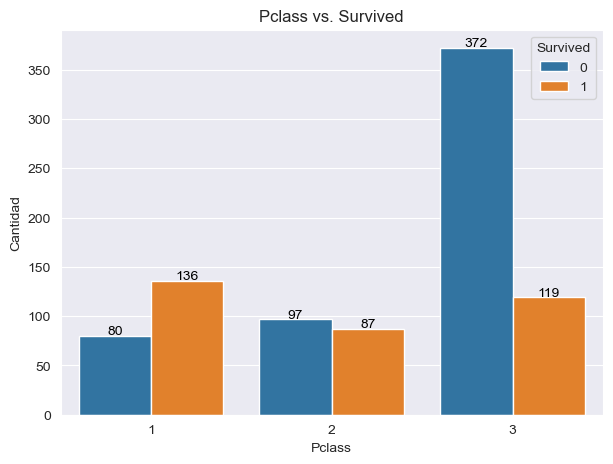

In [150]:
variable_vs_target(df_train, 'Pclass', sns.countplot)

    Para esta muestra se observa que la clase que sufrió más bajas fue la 3ra clase (menor nivel económico).

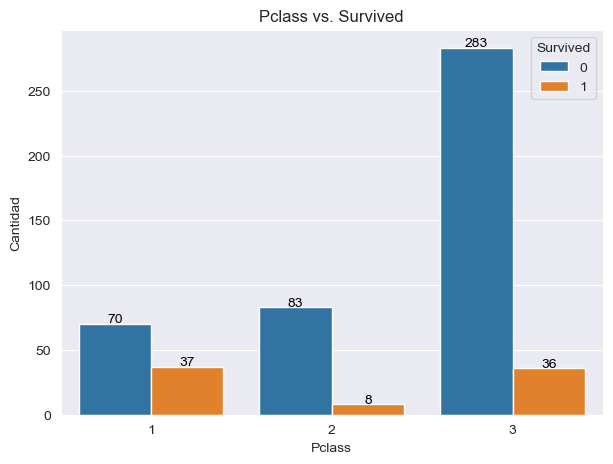

In [151]:
variable_vs_target(df_train[df_train['Title'] == 'Mr'], 'Pclass', sns.countplot)

    Similar al gráfico anterior, este muestra aquellos pasajeros con título honorífico 'Mr' y su clase social correspondiente, además de hacer la diferencia entre aquellos que sobrevivieron y aquellos que no.

### <span style="color:#87CEEB"> Age vs. Survived

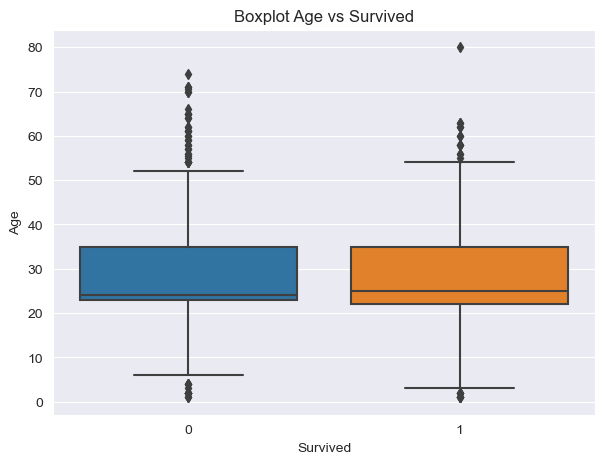

In [152]:
variable_vs_target(df_train, 'Age', sns.boxplot)

    El boxplot superior muestra que el 50% de los pasajeros a bordo tenían edades entre los 22 y los 35 años de edad.
    También se observa que la persona de mayor edad (80 años) logró sobrevivir (Según lo registrado en train.csv).


In [153]:
# pasajero más longevo a bordo del Titanic
df_train[df_train['Age'] > 75] 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
630,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,30.0,S,Mr


In [154]:
#  pasajero más longevo registrado en la muestra test.csv
df_test[df_test['Age'] > 75] 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
96,988,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,78.85,S,Mrs


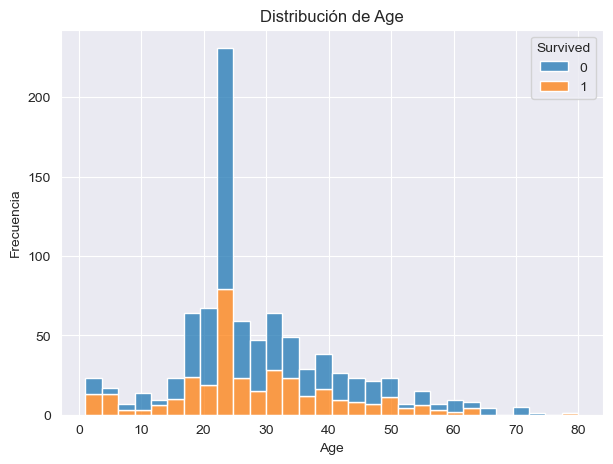

In [155]:
variable_vs_target(df_train, 'Age', sns.histplot)

    El gráfico superior muestra las concentracines de edades de los pasajeros y si sobrevivieron o no.

In [156]:
df_train.Age.describe()

count    891.000000
mean      28.749719
std       12.971823
min        1.000000
25%       22.000000
50%       24.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

### <span style="color:#87CEEB"> SibSp vs. Survived

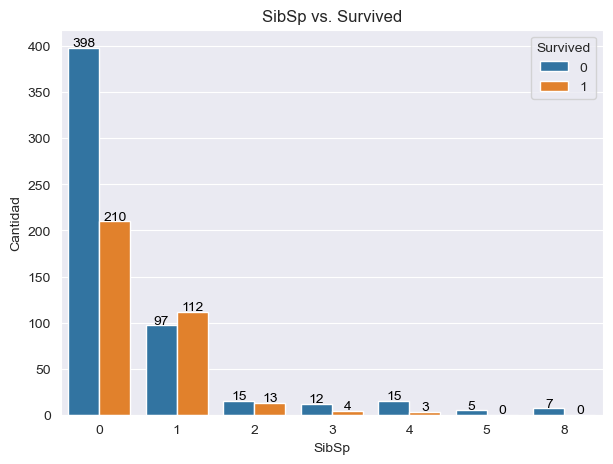

In [157]:
variable_vs_target(df_train, 'SibSp', sns.countplot)

    El gráfico superior indica la cantidad de familiares con los que viajaba cada pasajero. Cabe señalar que no necesariamente indica que el pasajero viajaba solo, porque por ejemplo podría ir de viaje con algún amigo o conocido.

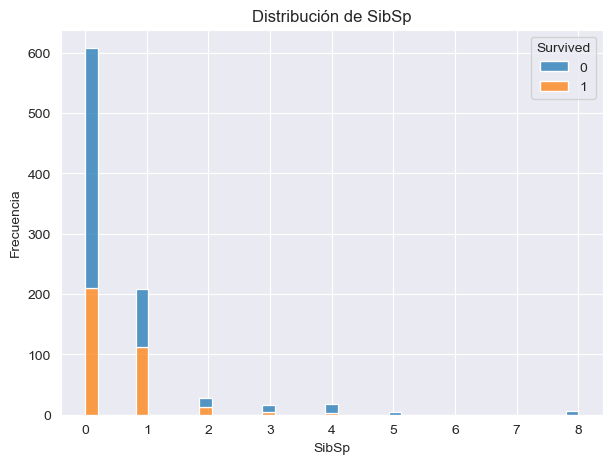

In [158]:
variable_vs_target(df_train, 'SibSp', sns.histplot)

### <span style="color:#87CEEB"> Parch vs. Survived

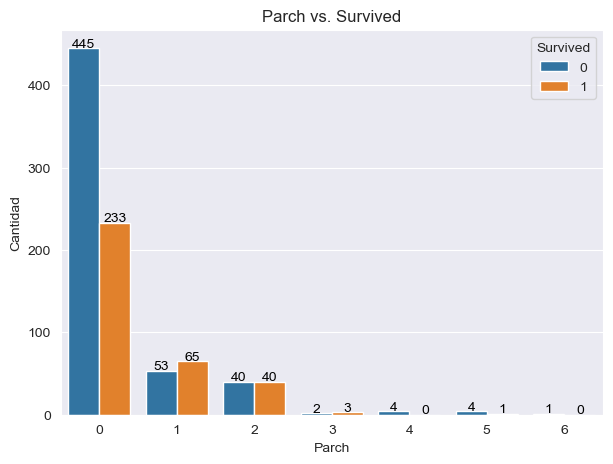

In [159]:
variable_vs_target(df_train, 'Parch', sns.countplot)

    Se observa que la mayoría de los pasajeros viajaba solo.

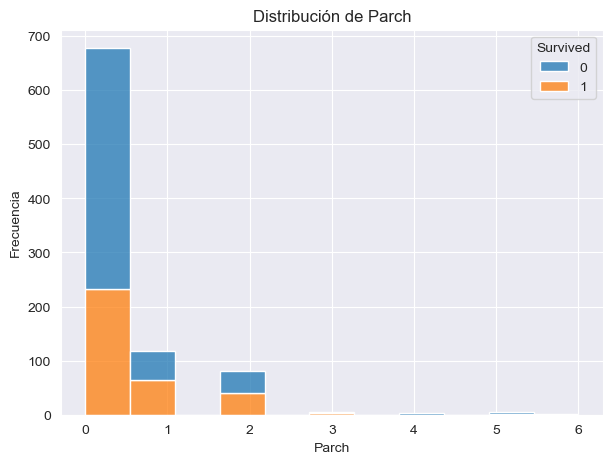

In [160]:
variable_vs_target(df_train, 'Parch', sns.histplot)

### <span style="color:#87CEEB"> Fare vs. Survived

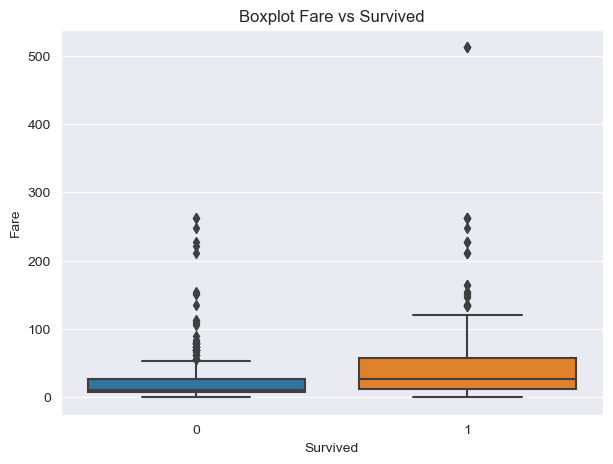

In [161]:
variable_vs_target(df_train, 'Fare', sns.boxplot)

In [162]:
df_test['Pclass'][df_test['Fare'] < 75].value_counts()

3    218
2     93
1     59
Name: Pclass, dtype: int64

    Se observa que la mayoría de los boletos vendidos correspondían a la 3ra clase.

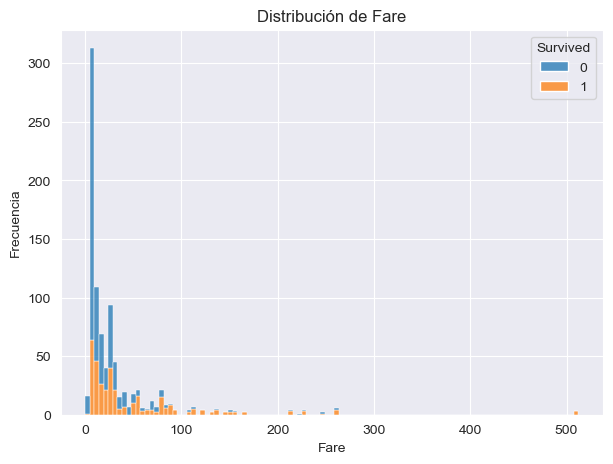

In [163]:
variable_vs_target(df_train, 'Fare', sns.histplot)

    El gráfico superior muestra la distribución de los boletos vendidos.

## <span style="color:orange"> Recodificación de variables

In [164]:
# eliminación de variable 'Name' en ambos datasets
df_train = df_train.copy().drop('Name', axis=1)
df_test = df_test.copy().drop('Name', axis=1)

In [165]:
# Binarización de atributo 'Sex'
df_train['Sex'] = np.where(df_train['Sex'] == 'male', 1, 0) # 1 male, 0 female
df_test['Sex'] = np.where(df_test['Sex'] == 'male', 1, 0)

In [166]:
display(df_train.head())
display(df_test.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,S,Mr
1,1,1,0,38.0,1,0,71.2833,C,Mrs
2,1,3,0,26.0,0,0,7.9250,S,Miss
3,1,1,0,35.0,1,0,53.1000,S,Mrs
4,0,3,1,35.0,0,0,8.0500,S,Mr


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,1,34.5,0,0,7.8292,Q,Mr
1,893,3,0,47.0,1,0,7.0000,S,Mrs
2,894,2,1,62.0,0,0,9.6875,Q,Mr
3,895,3,1,27.0,0,0,8.6625,S,Mr
4,896,3,0,22.0,1,1,12.2875,S,Mrs


In [167]:
# One Hot Encoding para el atributo 'Embarked'
dummies_embarked_train = pd.get_dummies(df_train['Embarked'], prefix='Embarked')
dummies_embarked_test = pd.get_dummies(df_test['Embarked'], prefix='Embarked')

# One Hot Encoding para el atributo 'Title'
dummies_title_train = pd.get_dummies(df_train['Title'], prefix='Title')
dummies_title_test = pd.get_dummies(df_test['Title'], prefix='Title')


# Concatenación con el DataFrame original para el conjunto de entrenamiento
df_train = pd.concat([df_train, dummies_embarked_train, dummies_title_train], axis=1).drop(['Embarked', 'Title'], axis=1)
df_test = pd.concat([df_test, dummies_embarked_test, dummies_title_test], axis=1).drop(['Embarked', 'Title'], axis=1)

In [168]:
# Muestra de recodificación realizada
display(df_train.head(2))
display(df_train.shape)
display(df_test.head(2))
display(df_test.shape)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0,3,1,22.0,1,0,7.2500,0,0,1,0,0,1,0,0
1,1,1,0,38.0,1,0,71.2833,1,0,0,0,0,0,1,0


(891, 15)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,892,3,1,34.5,0,0,7.8292,0,1,0,0,0,1,0,0
1,893,3,0,47.0,1,0,7.0000,0,0,1,0,0,0,1,0


(418, 15)

## <span style="color:orange"> Separación de muestras de entrenamiento y pruebas

In [169]:
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

# muestras de entrenamiento y validación para df_train
random_state=42
X_train_pre, X_test_pre, y_train, y_test = train_test_split(X, y,
                                                    test_size=.33, 
                                                    random_state=random_state)


# estandarización
scaler = StandardScaler().fit(X_train_pre)
X_train = pd.DataFrame(scaler.transform(X_train_pre), columns=X_train_pre.columns)
X_test = pd.DataFrame(scaler.transform(X_test_pre), columns=X_test_pre.columns)

## <span style="color:orange"> 1era iteración de modelación

### <span style="color:#87CEEB"> Modelos a implementar

In [170]:
# lista de modelos a implementar
models_list = [
    LogisticRegression(random_state=random_state),
    KNeighborsClassifier(),
    DecisionTreeClassifier(random_state=random_state),
    RandomForestClassifier(random_state=random_state),
    SVC(random_state=random_state),
    GaussianNB(),
    BernoulliNB(),
    GradientBoostingClassifier(random_state=random_state),
]

In [171]:
def modelacion(modelo, X_train, X_test, y_train, y_test):
    model_tmp_fit = modelo.fit(X_train, y_train)
    yhat_train = model_tmp_fit.predict(X_train)
    yhat = model_tmp_fit.predict(X_test)
    
    print (f'**** Métricas para modelo {modelo} ****\n')
    print(f'Métricas en train:\n',
            classification_report(y_train, yhat_train),
            '\n','-'*55,'\n', 
            'Métricas en test:\n',
            classification_report(y_test, yhat),
            '\n','_'*70,'\n')

    return model_tmp_fit, yhat_train, yhat

In [172]:
model_fit_it1, yhat_train_it1, yhat_it1 = {}, {}, {}

for model in models_list:
    model_fit, yhat_train, yhat = modelacion(model, X_train, X_test, y_train, y_test)
    model_fit_it1[str(model)] = model_fit
    yhat_train_it1[str(model)] = yhat_train
    yhat_it1[str(model)] = yhat

**** Métricas para modelo LogisticRegression(random_state=42) ****

Métricas en train:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       374
           1       0.78      0.72      0.75       222

    accuracy                           0.82       596
   macro avg       0.81      0.80      0.80       596
weighted avg       0.82      0.82      0.82       596
 
 ------------------------------------------------------- 
 Métricas en test:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       175
           1       0.80      0.78      0.79       120

    accuracy                           0.83       295
   macro avg       0.83      0.82      0.82       295
weighted avg       0.83      0.83      0.83       295
 
 ______________________________________________________________________ 

**** Métricas para modelo KNeighborsClassifier() ****

Métricas en train:
               precision    re

**** Métricas para modelo RandomForestClassifier(random_state=42) ****

Métricas en train:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       374
           1       0.99      0.96      0.97       222

    accuracy                           0.98       596
   macro avg       0.98      0.98      0.98       596
weighted avg       0.98      0.98      0.98       596
 
 ------------------------------------------------------- 
 Métricas en test:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       175
           1       0.74      0.74      0.74       120

    accuracy                           0.79       295
   macro avg       0.78      0.78      0.78       295
weighted avg       0.79      0.79      0.79       295
 
 ______________________________________________________________________ 

**** Métricas para modelo SVC(random_state=42) ****

Métricas en train:
               precision    

### <span style="color:#87CEEB"> Feature Importance

In [173]:
def plot_importance(fit_model, feat_names, top_n=100):
    tmp_importance = fit_model.feature_importances_
    sort_importance = np.argsort(tmp_importance)[::-1][:top_n]
    names = [feat_names[i] for i in sort_importance]
    plt.title("Feature importance")
    plt.barh(range(len(sort_importance)), tmp_importance[sort_importance])
    plt.yticks(range(len(sort_importance)), names, rotation=0)

In [174]:
model_fit_it1['RandomForestClassifier(random_state=42)']

RandomForestClassifier(random_state=42)

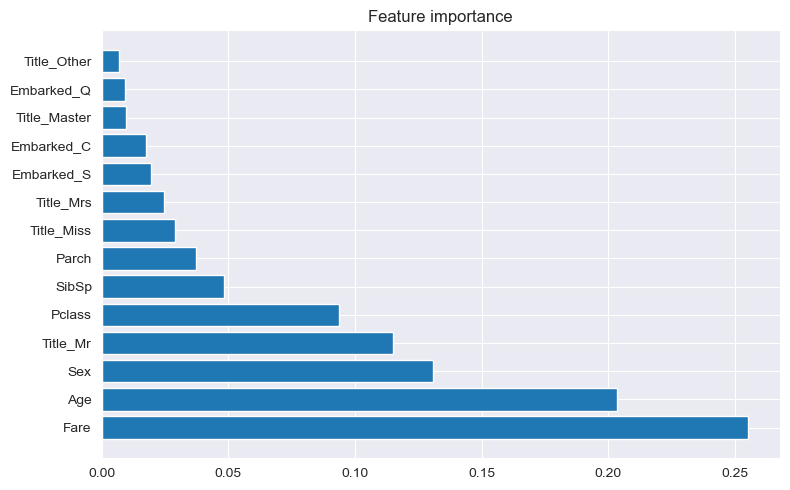

In [175]:
colnames = X_train.columns
plt.figure (figsize = (8,5))
plot_importance(model_fit_it1['RandomForestClassifier(random_state=42)'], colnames, top_n=14) # 14 atributos
plt.tight_layout()

## <span style="color:orange"> 2da iteración de modelación

    A partir de esta iteración se considerarán grillas de hiperparámetros.

### <span style="color:#87CEEB"> LogisticRegression

In [176]:
lr_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
    'fit_intercept': [True, False],
    'class_weight': [None, 'balanced'],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'max_iter': [10, 50, 100]
}

model_lr_2 = GridSearchCV(LogisticRegression(random_state=random_state),
                                lr_params,
                                cv=5,
                                n_jobs=-1)

model_lr_2_fit, yhat_train_lr_2, yhat_lr_2 = modelacion(model_lr_2, X_train, X_test, y_train, y_test)
print('Mejores hiperparámetros:\n', model_lr_2_fit.best_params_)

# 12s

**** Métricas para modelo GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'class_weight': [None, 'balanced'],
                         'fit_intercept': [True, False],
                         'max_iter': [10, 50, 100],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']}) ****

Métricas en train:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87       374
           1       0.79      0.75      0.77       222

    accuracy                           0.83       596
   macro avg       0.82      0.81      0.82       596
weighted avg       0.83      0.83      0.83       596
 
 ------------------------------------------------------- 


### <span style="color:#87CEEB"> KNeighborsClassifier

In [177]:
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

model_knn_2 = GridSearchCV(KNeighborsClassifier(),
                            knn_params,
                            cv=5,
                            n_jobs=-1)

model_knn_2_fit, yhat_train_knn_2, yhat_knn_2 = modelacion(model_knn_2, X_train, X_test, y_train, y_test)
print('Mejores hiperparámetros:\n', model_knn_2_fit.best_params_)

# 1s

**** Métricas para modelo GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']}) ****

Métricas en train:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88       374
           1       0.86      0.69      0.77       222

    accuracy                           0.84       596
   macro avg       0.85      0.81      0.82       596
weighted avg       0.84      0.84      0.84       596
 
 ------------------------------------------------------- 
 Métricas en test:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       175
           1       0.85      0.71      0.77       120

    accuracy                           0.83       295
   macro avg       0.84      0.81      0.82   

### <span style="color:#87CEEB"> DecisionTreeClassifier

In [178]:
dec_tree_params = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['sqrt', 'log2', None]
}

model_dec_tree_2 = GridSearchCV(DecisionTreeClassifier(random_state=random_state),
                            dec_tree_params,
                            cv=5,
                            n_jobs=-1)

model_dec_tree_2_fit, yhat_train_dec_tree_2, yhat_dec_tree_2 = modelacion(model_dec_tree_2, X_train, X_test, y_train, y_test)
print('Mejores hiperparámetros:\n', model_dec_tree_2_fit.best_params_)

# 1s

**** Métricas para modelo GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10]}) ****

Métricas en train:
               precision    recall  f1-score   support

           0       0.86      0.91      0.89       374
           1       0.84      0.76      0.80       222

    accuracy                           0.86       596
   macro avg       0.85      0.84      0.84       596
weighted avg       0.85      0.86      0.85       596
 
 ------------------------------------------------------- 
 Métricas en test:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       175
           1       0.80      0.72      0.76       120

    accuracy                           0.81       295
  

### <span style="color:#87CEEB"> RandomForestClassifier

In [179]:
rf_params = {
    'n_estimators': [10, 50, 100],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['sqrt', 'log2', None]
}

model_rf_2 = GridSearchCV(RandomForestClassifier(random_state=random_state),
                            rf_params,
                            cv=5,
                            n_jobs=-1)

model_rf_2_fit, yhat_train_rf_2, yhat_rf_2 = modelacion(model_rf_2, X_train, X_test, y_train, y_test)
print('Mejores hiperparámetros:\n', model_rf_2_fit.best_params_)

# 1min 3s

**** Métricas para modelo GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]}) ****

Métricas en train:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       374
           1       0.90      0.77      0.83       222

    accuracy                           0.88       596
   macro avg       0.89      0.86      0.87       596
weighted avg       0.88      0.88      0.88       596
 
 ------------------------------------------------------- 
 Métricas en test:
               precision    recall  f1-score   support

           0       0.82      0.89      0.

### <span style="color:#87CEEB"> SVC

In [180]:
svc_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'probability': [True, False]
}

model_svc_2 = GridSearchCV(SVC(random_state=random_state),
                            svc_params,
                            cv=5,
                            n_jobs=-1)

model_svc_2_fit, yhat_train_svc_2, yhat_svc_2 = modelacion(model_svc_2, X_train, X_test, y_train, y_test)
print('Mejores hiperparámetros:\n', model_svc_2_fit.best_params_)

# 2s

**** Métricas para modelo GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid'],
                         'probability': [True, False]}) ****

Métricas en train:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89       374
           1       0.87      0.70      0.78       222

    accuracy                           0.85       596
   macro avg       0.86      0.82      0.83       596
weighted avg       0.85      0.85      0.85       596
 
 ------------------------------------------------------- 
 Métricas en test:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       175
           1       0.85      0.70      0.77       120

    accuracy                           0.83       295
   macro avg       0.83      0.81      0.81       295
weighted avg   

### <span style="color:#87CEEB"> BernoulliNB

In [181]:
bernoulli_params = {
    'alpha': [ 0.01, 0.1, 0.5, 1.0, 2.0],
    'binarize': [None, 0.1, 0.5, 0.9],
    'fit_prior': [True, False]
}

model_bernoulli_2 = GridSearchCV(BernoulliNB(),
                            bernoulli_params,
                            cv=5,
                            n_jobs=-1)

model_bernoulli_2_fit, yhat_train_bernoulli_2, yhat_bernoulli_2 = modelacion(model_bernoulli_2, X_train, X_test, y_train, y_test)
print('Mejores hiperparámetros:\n', model_bernoulli_2_fit.best_params_)

# 1s

**** Métricas para modelo GridSearchCV(cv=5, estimator=BernoulliNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 2.0],
                         'binarize': [None, 0.1, 0.5, 0.9],
                         'fit_prior': [True, False]}) ****

Métricas en train:
               precision    recall  f1-score   support

           0       0.84      0.83      0.84       374
           1       0.72      0.73      0.73       222

    accuracy                           0.80       596
   macro avg       0.78      0.78      0.78       596
weighted avg       0.80      0.80      0.80       596
 
 ------------------------------------------------------- 
 Métricas en test:
               precision    recall  f1-score   support

           0       0.85      0.82      0.83       175
           1       0.75      0.78      0.77       120

    accuracy                           0.81       295
   macro avg       0.80      0.80      0.80       295
weighted avg       0.81      0.81      

### <span style="color:#87CEEB"> GradientBoostingClassifier

In [182]:
gboost_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5, 1, 5, 10],
    'subsample': np.linspace(0.1, 1.0, 10, endpoint=True, dtype=float),
    'max_depth': [3, 5, 7]
}

model_gboost_2 = GridSearchCV(GradientBoostingClassifier(random_state=random_state),
                            gboost_params,
                            cv=5,
                            n_jobs=-1)

model_gboost_2_fit, yhat_train_gboost_2, yhat_gboost_2 = modelacion(model_gboost_2, X_train, X_test, y_train, y_test)
print('Mejores hiperparámetros:\n', model_gboost_2_fit.best_params_)

# 2min

**** Métricas para modelo GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1, 5, 10],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}) ****

Métricas en train:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       374
           1       0.94      0.81      0.87       222

    accuracy                           0.91       596
   macro avg       0.92      0.89      0.90       596
weighted avg       0.91      0.91      0.91       596
 
 ------------------------------------------------------- 
 Métricas en test:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86       175
           1       0.83      0.73      0.78       120

    a

## <span style="color:orange"> 3ra iteración de modelación

    Se utilizarán las mismas grillas de hiperparámetros.

#### <span style="color:#87CEEB"> Balanceo de clases con SMOTE

In [183]:
# Instanciamos la clase
oversampler = SMOTE(random_state=random_state, sampling_strategy='minority')

# Oversampling de los datos de entrenamiento
X_train_oversamp, y_train_oversamp = oversampler.fit_resample(X_train, y_train)

### <span style="color:#87CEEB"> LogisticRegression

In [184]:
lr_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
    'fit_intercept': [True, False],
    #'class_weight': [None, 'balanced'], # ya se hizo balance de clases con SMOTE
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'max_iter': [10, 50, 100]
}

model_lr_3 = GridSearchCV(LogisticRegression(random_state=random_state),
                                lr_params,
                                cv=5,
                                n_jobs=-1)

model_lr_3_fit, yhat_train_lr_3, yhat_lr_3 = modelacion(model_lr_3, X_train_oversamp, X_test, y_train_oversamp, y_test)
print('Mejores hiperparámetros:\n', model_lr_3_fit.best_params_)

# 5s

**** Métricas para modelo GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'fit_intercept': [True, False],
                         'max_iter': [10, 50, 100],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']}) ****

Métricas en train:
               precision    recall  f1-score   support

           0       0.78      0.84      0.81       374
           1       0.83      0.76      0.79       374

    accuracy                           0.80       748
   macro avg       0.81      0.80      0.80       748
weighted avg       0.81      0.80      0.80       748
 
 ------------------------------------------------------- 
 Métricas en test:
               precision    recall  f1-sco

### <span style="color:#87CEEB"> KNeighborsClassifier

In [185]:
model_knn_3 = GridSearchCV(KNeighborsClassifier(),
                            knn_params,
                            cv=5,
                            n_jobs=-1)

model_knn_3_fit, yhat_train_knn_3, yhat_knn_3 = modelacion(model_knn_3, X_train_oversamp, X_test, y_train_oversamp, y_test)
print('Mejores hiperparámetros:\n', model_knn_3_fit.best_params_)

# 1s

**** Métricas para modelo GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']}) ****

Métricas en train:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       374
           1       1.00      0.97      0.98       374

    accuracy                           0.98       748
   macro avg       0.98      0.98      0.98       748
weighted avg       0.98      0.98      0.98       748
 
 ------------------------------------------------------- 
 Métricas en test:
               precision    recall  f1-score   support

           0       0.86      0.79      0.83       175
           1       0.73      0.82      0.77       120

    accuracy                           0.80       295
   macro avg       0.80      0.81      0.80   

### <span style="color:#87CEEB"> DecisionTreeClassifier

In [186]:
model_dec_tree_3 = GridSearchCV(DecisionTreeClassifier(random_state=random_state),
                            dec_tree_params,
                            cv=5,
                            n_jobs=-1)

model_dec_tree_3_fit, yhat_train_dec_tree_3, yhat_dec_tree_3 = modelacion(model_dec_tree_3, X_train_oversamp, X_test, y_train_oversamp, y_test)
print('Mejores hiperparámetros:\n', model_dec_tree_3_fit.best_params_)

# 1s

**** Métricas para modelo GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10]}) ****

Métricas en train:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       374
           1       0.92      0.86      0.89       374

    accuracy                           0.89       748
   macro avg       0.89      0.89      0.89       748
weighted avg       0.89      0.89      0.89       748
 
 ------------------------------------------------------- 
 Métricas en test:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       175
           1       0.76      0.75      0.75       120

    accuracy                           0.80       295
  

### <span style="color:#87CEEB"> RandomForestClassifier

In [187]:
model_rf_3 = GridSearchCV(RandomForestClassifier(random_state=random_state),
                            rf_params,
                            cv=5,
                            n_jobs=-1)

model_rf_3_fit, yhat_train_rf_3, yhat_rf_3 = modelacion(model_rf_3, X_train_oversamp, X_test, y_train_oversamp, y_test)
print('Mejores hiperparámetros:\n', model_rf_3_fit.best_params_)

# 1min 15s

**** Métricas para modelo GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]}) ****

Métricas en train:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       374
           1       0.99      0.98      0.98       374

    accuracy                           0.98       748
   macro avg       0.98      0.98      0.98       748
weighted avg       0.98      0.98      0.98       748
 
 ------------------------------------------------------- 
 Métricas en test:
               precision    recall  f1-score   support

           0       0.84      0.79      0.

### <span style="color:#87CEEB"> SVC

In [188]:
model_svc_3 = GridSearchCV(SVC(random_state=random_state),
                            svc_params,
                            cv=5,
                            n_jobs=-1)

model_svc_3_fit, yhat_train_svc_3, yhat_svc_3 = modelacion(model_svc_3, X_train_oversamp, X_test, y_train_oversamp, y_test)
print('Mejores hiperparámetros:\n', model_svc_3_fit.best_params_)

# 2s

**** Métricas para modelo GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid'],
                         'probability': [True, False]}) ****

Métricas en train:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       374
           1       0.90      0.76      0.83       374

    accuracy                           0.84       748
   macro avg       0.85      0.84      0.84       748
weighted avg       0.85      0.84      0.84       748
 
 ------------------------------------------------------- 
 Métricas en test:
               precision    recall  f1-score   support

           0       0.84      0.87      0.86       175
           1       0.81      0.76      0.78       120

    accuracy                           0.83       295
   macro avg       0.82      0.82      0.82       295
weighted avg   

### <span style="color:#87CEEB"> BernoulliNB

In [189]:
model_bernoulli_3 = GridSearchCV(BernoulliNB(),
                            bernoulli_params,
                            cv=5,
                            n_jobs=-1)

model_bernoulli_3_fit, yhat_train_bernoulli_3, yhat_bernoulli_3 = modelacion(model_bernoulli_3, X_train_oversamp, X_test, y_train_oversamp, y_test)
print('Mejores hiperparámetros:\n', model_bernoulli_3_fit.best_params_)

# 1s

**** Métricas para modelo GridSearchCV(cv=5, estimator=BernoulliNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 2.0],
                         'binarize': [None, 0.1, 0.5, 0.9],
                         'fit_prior': [True, False]}) ****

Métricas en train:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78       374
           1       0.79      0.75      0.77       374

    accuracy                           0.77       748
   macro avg       0.77      0.77      0.77       748
weighted avg       0.77      0.77      0.77       748
 
 ------------------------------------------------------- 
 Métricas en test:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       175
           1       0.74      0.78      0.76       120

    accuracy                           0.80       295
   macro avg       0.79      0.80      0.79       295
weighted avg       0.80      0.80      

### <span style="color:#87CEEB"> GradientBoostingClassifier

In [190]:
model_gboost_3 = GridSearchCV(GradientBoostingClassifier(random_state=random_state),
                            gboost_params,
                            cv=5,
                            n_jobs=-1)

model_gboost_3_fit, yhat_train_gboost_3, yhat_gboost_3 = modelacion(model_gboost_3, X_train_oversamp, X_test, y_train_oversamp, y_test)
print('Mejores hiperparámetros:\n', model_gboost_3_fit.best_params_)

# 2min 11s

**** Métricas para modelo GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1, 5, 10],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}) ****

Métricas en train:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       374
           1       0.98      0.93      0.95       374

    accuracy                           0.96       748
   macro avg       0.96      0.96      0.96       748
weighted avg       0.96      0.96      0.96       748
 
 ------------------------------------------------------- 
 Métricas en test:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       175
           1       0.79      0.77      0.78       120

    a

#### <span style="color:#87CEEB"> VotingClassifier

    Al realizar VotingClassifier se mejoró en 1% el puntaje máximo de accuracy obtenido previamente logrando un valor de 0.84. También mejorar las métricas de f1_score. Se observa que este modelo formado a partir de otros no hace overfitting a los datos ya que las métricas entre train y test son similares.

In [191]:
estimadores = [
    ('LogisticRegression', model_lr_3_fit.best_estimator_),
    ('GradientBoostingClassifier', model_gboost_3_fit.best_estimator_),
    ('SVC', model_svc_3_fit.best_estimator_)
]
voting_model = VotingClassifier(estimators=estimadores,
                                    voting='soft',
                                    n_jobs=-1)

model_voting_fit, yhat_train_voting, yhat_voting = modelacion(voting_model, X_train_oversamp, X_test, y_train_oversamp, y_test)

# 1s

**** Métricas para modelo VotingClassifier(estimators=[('LogisticRegression',
                              LogisticRegression(C=0.1, max_iter=10,
                                                 multi_class='multinomial',
                                                 random_state=42,
                                                 solver='newton-cg')),
                             ('GradientBoostingClassifier',
                              GradientBoostingClassifier(learning_rate=0.01,
                                                         max_depth=7,
                                                         n_estimators=300,
                                                         random_state=42,
                                                         subsample=0.5)),
                             ('SVC',
                              SVC(C=10, gamma='auto', probability=True,
                                  random_state=42))],
                 n_jobs=-1, voting='soft') ****

## <span style="color:orange"> Evaluación en la muestra de pruebas df_test

In [192]:
df_test.head(1)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,892,3,1,34.5,0,0,7.8292,0,1,0,0,0,1,0,0


In [193]:
# muestra de prueba del dataset test.csv
X_val = df_test.loc[:, 'Pclass':]

# predicciones en dataset test.csv
y_pred = model_voting_fit.predict(X_val)

# Dataset submission
submission = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': y_pred})

#### <span style="color:#87CEEB"> Creación de archivo submission.csv solicitado en la competencia

In [194]:
# guardado en archivo csv
submission.to_csv('submission.csv', index=False)